# Stroop Effect

Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

[Link](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)

### What is the dependent variable?

The time in seconds that it takes to name the ink colours in equally-sized lists

### What is the independent variable?

The 2 conditions: 1) A congruent words condition. 2) An incongruent words condition

### What is the treatment variable?

There is none in this experiment

### Define the Null and alternative hypothesis

$$H_0: \mu_{congruent} = \mu_{incongruent}$$
    
$$H_A: \mu_{congruent} \neq \mu_{incongurent}$$  

The null hypothesis is that there is no difference in population means (measured in seconds), of the congruent and incongruent words condition, taken to complete the tasks. i. e $$ H_0: \mu_{congruent} - \mu_{incongruent} = 0$$
The alternative hypothesis is that there is a significant difference in population means (measured in seconds), of the congruent and incongruent words condition, taken to complete the tasks

### What is the type of test to perform on the samples?

A dependent t-test (two tailed) for paired samples; this is because the same participant is subjected to 2 tasks: A congruent task. and, 2) An incongruent task.

Some assumptions made to support this choice of test

1) We are working with only a small subset of sample data<br>
2) It is assumed that this samples are drawn from a population that is normally distributed<br>
3) Population parameters such as population mean and variance are unknown

### Descriptive statistics

In [21]:
import pandas as pd
import os

path = r'W:\Udacity\DAND'
filename = 'stroopdata.csv'

stroop_df = pd.read_csv(os.path.join(path, filename))
stroop_df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [22]:
stroop_df['Diff'] = stroop_df['Congruent'] - stroop_df['Incongruent']

In [23]:
print 'Congruent sample mean = {0:.2f} seconds \nIncongruent sample mean = {1:.2f} seconds \
\nDifference in sample mean = {2:.2f} seconds'.format(*stroop_df.mean())

Congruent sample mean = 14.19 seconds 
Incongruent sample mean = 22.29 seconds 
Difference in sample mean = -8.10 seconds


In [24]:
print 'Congruent sample median = {0:.2f} seconds \nIncongruent sample median = {1:.2f} seconds \
\nDifference in sample median = {2:.2f} seconds'.format(*stroop_df.median())

Congruent sample median = 14.48 seconds 
Incongruent sample median = 21.16 seconds 
Difference in sample median = -8.13 seconds


In [25]:
print 'Congruent sample range = {0:.2f} seconds \nIncongruent sample range = {1:.2f} seconds \
\nDifference in sample range = {2:.2f} seconds'. format(*(stroop_df['Congruent'].max() - stroop_df['Congruent'].min(), stroop_df['Incongruent'].max() - stroop_df['Incongruent'].min(),
                                                         stroop_df['Diff'].max() - stroop_df['Diff'].min()))

Congruent sample range = 13.70 seconds 
Incongruent sample range = 19.57 seconds 
Difference in sample range = 19.97 seconds


In [26]:
print 'Congruent sample standard deviation = {0:.2f} seconds \nIncongruent sample stadard deviation = {1:.2f} seconds \
\nDifference in sample standard deviation = {2:.2f} seconds'.format(*
                                                                                                                     (stroop_df['Congruent'].std(ddof=1), stroop_df['Incongruent'].std(ddof=1), stroop_df['Diff'].std(ddof=1)))

Congruent sample standard deviation = 3.55 seconds 
Incongruent sample stadard deviation = 4.89 seconds 
Difference in sample standard deviation = 4.81 seconds


### Box plot distribution of the 2 samples

Reshape the data<br>
Drop redundant column<br>
Rename the columns

In [27]:
stroop_df = stroop_df.drop('Diff', axis=1)
stroop_unstack_df = stroop_df.unstack().reset_index()
stroop_unstack_df = stroop_unstack_df.drop(['level_1'], axis=1)
stroop_unstack_df.rename(columns={'level_0': 'Condition', 0: 'Time_seconds'}, inplace=True)
stroop_unstack_df.head()

,Condition,Time_seconds
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564
3,Congruent,8.630
4,Congruent,14.669


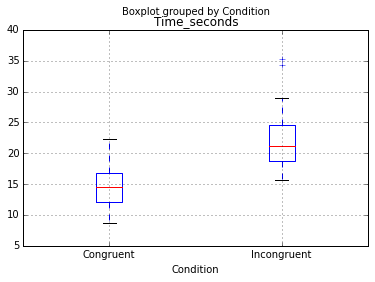

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

boxplt = stroop_unstack_df.boxplot(column='Time_seconds', by='Condition')
boxplt

The distribution of the Incongruent samples suggests that it is wider and right-skewed due to presence of outliers. Relatively, the distribution of Congruent samples is more or less narrower and symmetric

### Scatter plot of Congruent and Incongruent samples

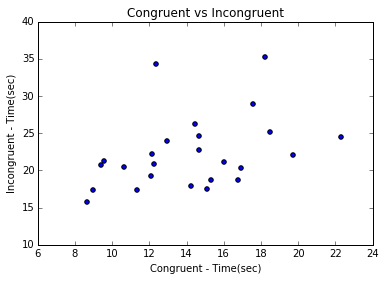

In [29]:
plt.scatter(stroop_df['Congruent'], stroop_df['Incongruent'])
plt.title('Congruent vs Incongruent')
plt.xlabel('Congruent - Time(sec)')
plt.ylabel('Incongruent - Time(sec)')

The scatter plot shows a positive trend between the congruent samples and incongruent samples

### t distribution plot of congruent and incongruent sample data

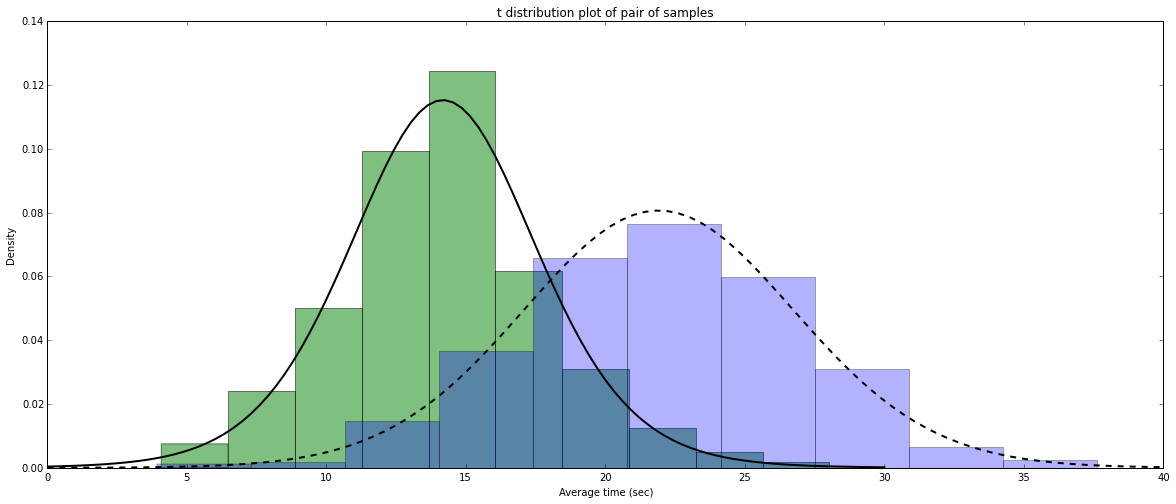

In [30]:
import scipy.stats as stats
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#stroop_unstack_df.hist(column='Time_seconds', by='Condition', normed=True)
#plt.xticks(rotation=0)

df_congruent = df_incongruent = stroop_df.shape[0] - 1


cong_rv = stats.t.rvs(loc=stroop_df['Congruent'].mean(), scale=stroop_df['Congruent'].std(ddof=1), df=df_congruent, size=500)
df, loc, scale = stats.t.fit(cong_rv)

plt.hist(cong_rv, normed=True, alpha=0.5, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
cong_pdf = stats.t.pdf(x, loc=loc, scale=scale, df=df)
plt.plot(x, cong_pdf, 'k', linewidth=2)


incong_rv = stats.t.rvs(loc=stroop_df['Incongruent'].mean(), scale=stroop_df['Incongruent'].std(ddof=1), df=df_incongruent, size=500)
df, loc, scale = stats.t.fit(incong_rv)

plt.hist(incong_rv, normed=True, alpha=0.3, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
incong_pdf = stats.t.pdf(x, loc=loc, scale=scale, df=df)
plt.plot(x, incong_pdf, 'k--', linewidth=2)
plt.title('t distribution plot of pair of samples')
plt.xlabel('Average time (sec)')
plt.ylabel('Density')




The t distribution plot of the pair of samples clearly reveals that the distribution of Incongruent samples is more spread out comapred
with that of the Congruent samples plot

### Perform statistical test to confirm or disprove null hypothesis

The two-tailed test is being performed at a significance level of 0.05

In [31]:
alpha = 0.05

In [32]:
t_critical = stats.t.ppf(1-alpha/2, df_congruent)
print 't critical at alpha of {} and df of {} is {:.3f}'.format(alpha, df_congruent, t_critical)

t critical at alpha of 0.05 and df of 24 is 2.064


In [33]:
t_test, p_value = stats.ttest_rel(stroop_df['Congruent'], stroop_df['Incongruent'])
print 'For the two-tailed test, t test statistic is {:.3f} and p-value is {:.3f}'.format(t_test, p_value)

For the two-tailed test, t test statistic is -8.420 and p-value is 0.000


The t test statistic is far out in the left tail, much below the t critical, of the t distribution that it can be considered
significant

Cohen's d

In [34]:
Difference_means = -8.10
Sample_std_dev = 4.81

print 'Cohen''s is {:.2f}'.format(Difference_means/Sample_std_dev)

Cohens is -1.68


$$r^{2}$$

In [35]:
print 'r2 for this experiment is {:.2f}'.format(t_test**2/(t_test**2 + df_congruent))

r2 for this experiment is 0.75


75% of the variability in the dependent variable is explained by the independent variable.

### 95% Confidence Interval for the difference of means

In [36]:
#import scipy
#import scikits.bootstrap as bootstrap 

#lower_limit, upper_limit = bootstrap.ci(data=stroop_df, statfunction=scipy.mean)
mean_diff = -8.1
sample_size = len(stroop_df)
sem = 4.81 /np.sqrt(sample_size)
margin_of_error = t_critical * sem
lower_limit = mean_diff - margin_of_error
upper_limit = mean_diff + margin_of_error
print '95% CI for the difference of means is ({:.2f}, {:.2f})'.format(lower_limit, upper_limit)

95% CI for the difference of means is (-10.09, -6.11)


On average, a participant spends about 6 to 10 seconds lesser on the first task than on the second task

Based on this result, we can reject the null hypothesis that there is no difference in time taken to complete the task under
the 2 conditions. The result is statistically significant, and it is relevant to scientists, as it tells us how the human brain reacts when
asked to read out the color of inked words rather than the words themselves. These results agreed with my hypothesis that the mean difference in time taken under the 2 conditions are statistically significant. During the second test, I conciously took longer time to complete the task in order to avoid making mistakes.

## Resources

[steps to perform hypothesis](https://classroom.udacity.com/nanodegrees/nd002/parts/0021345402/modules/458220420175460/lessons/4578095863/concepts/1470193290923#)<br>
[unstack pandas df](http://stackoverflow.com/questions/20847508/unstacking-data-with-pandas)<br>
[plot normal distribution](http://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib)<br>
[t stats](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)<br>
[fit t distribution](http://stackoverflow.com/questions/36051942/anomalies-when-trying-to-fit-students-t-distribution-using-scipy)<br>
[fit normal distribution](http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data)<br>
[paired t test statistic](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)  

In [37]:
"a b c".split(' ')

['a', 'b', 'c']